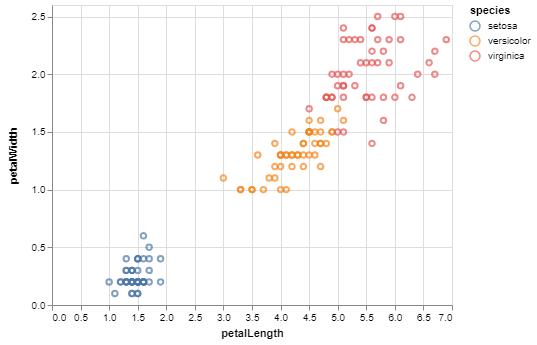

In [57]:
import altair as alt
from vega_datasets import data


alt.renderers.enable('default')
iris = data.iris()

chart = alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

chart

In [58]:
import altair as alt
import pandas as pd


data_path = 'data/AUM_V4_Activity_2018-06-21_17-16-27.csv'
# with open(data_path) as f:
#     for line in f:
#         print(line)

df = pd.read_csv(data_path)
df = df[:-3]

In [59]:
df.head()

,App name,Date,Time,Duration
0,App Usage,6/21/18,5:15:40 PM,0:00:00
1,System UI,6/21/18,5:15:38 PM,0:00:02
2,Files,6/21/18,5:15:36 PM,0:00:02
3,Screen on (unlocked),6/21/18,5:15:36 PM,0:00:00
4,Screen on (locked),6/21/18,5:15:28 PM,0:00:08


In [60]:
files = df['App name'] == "Tinder"

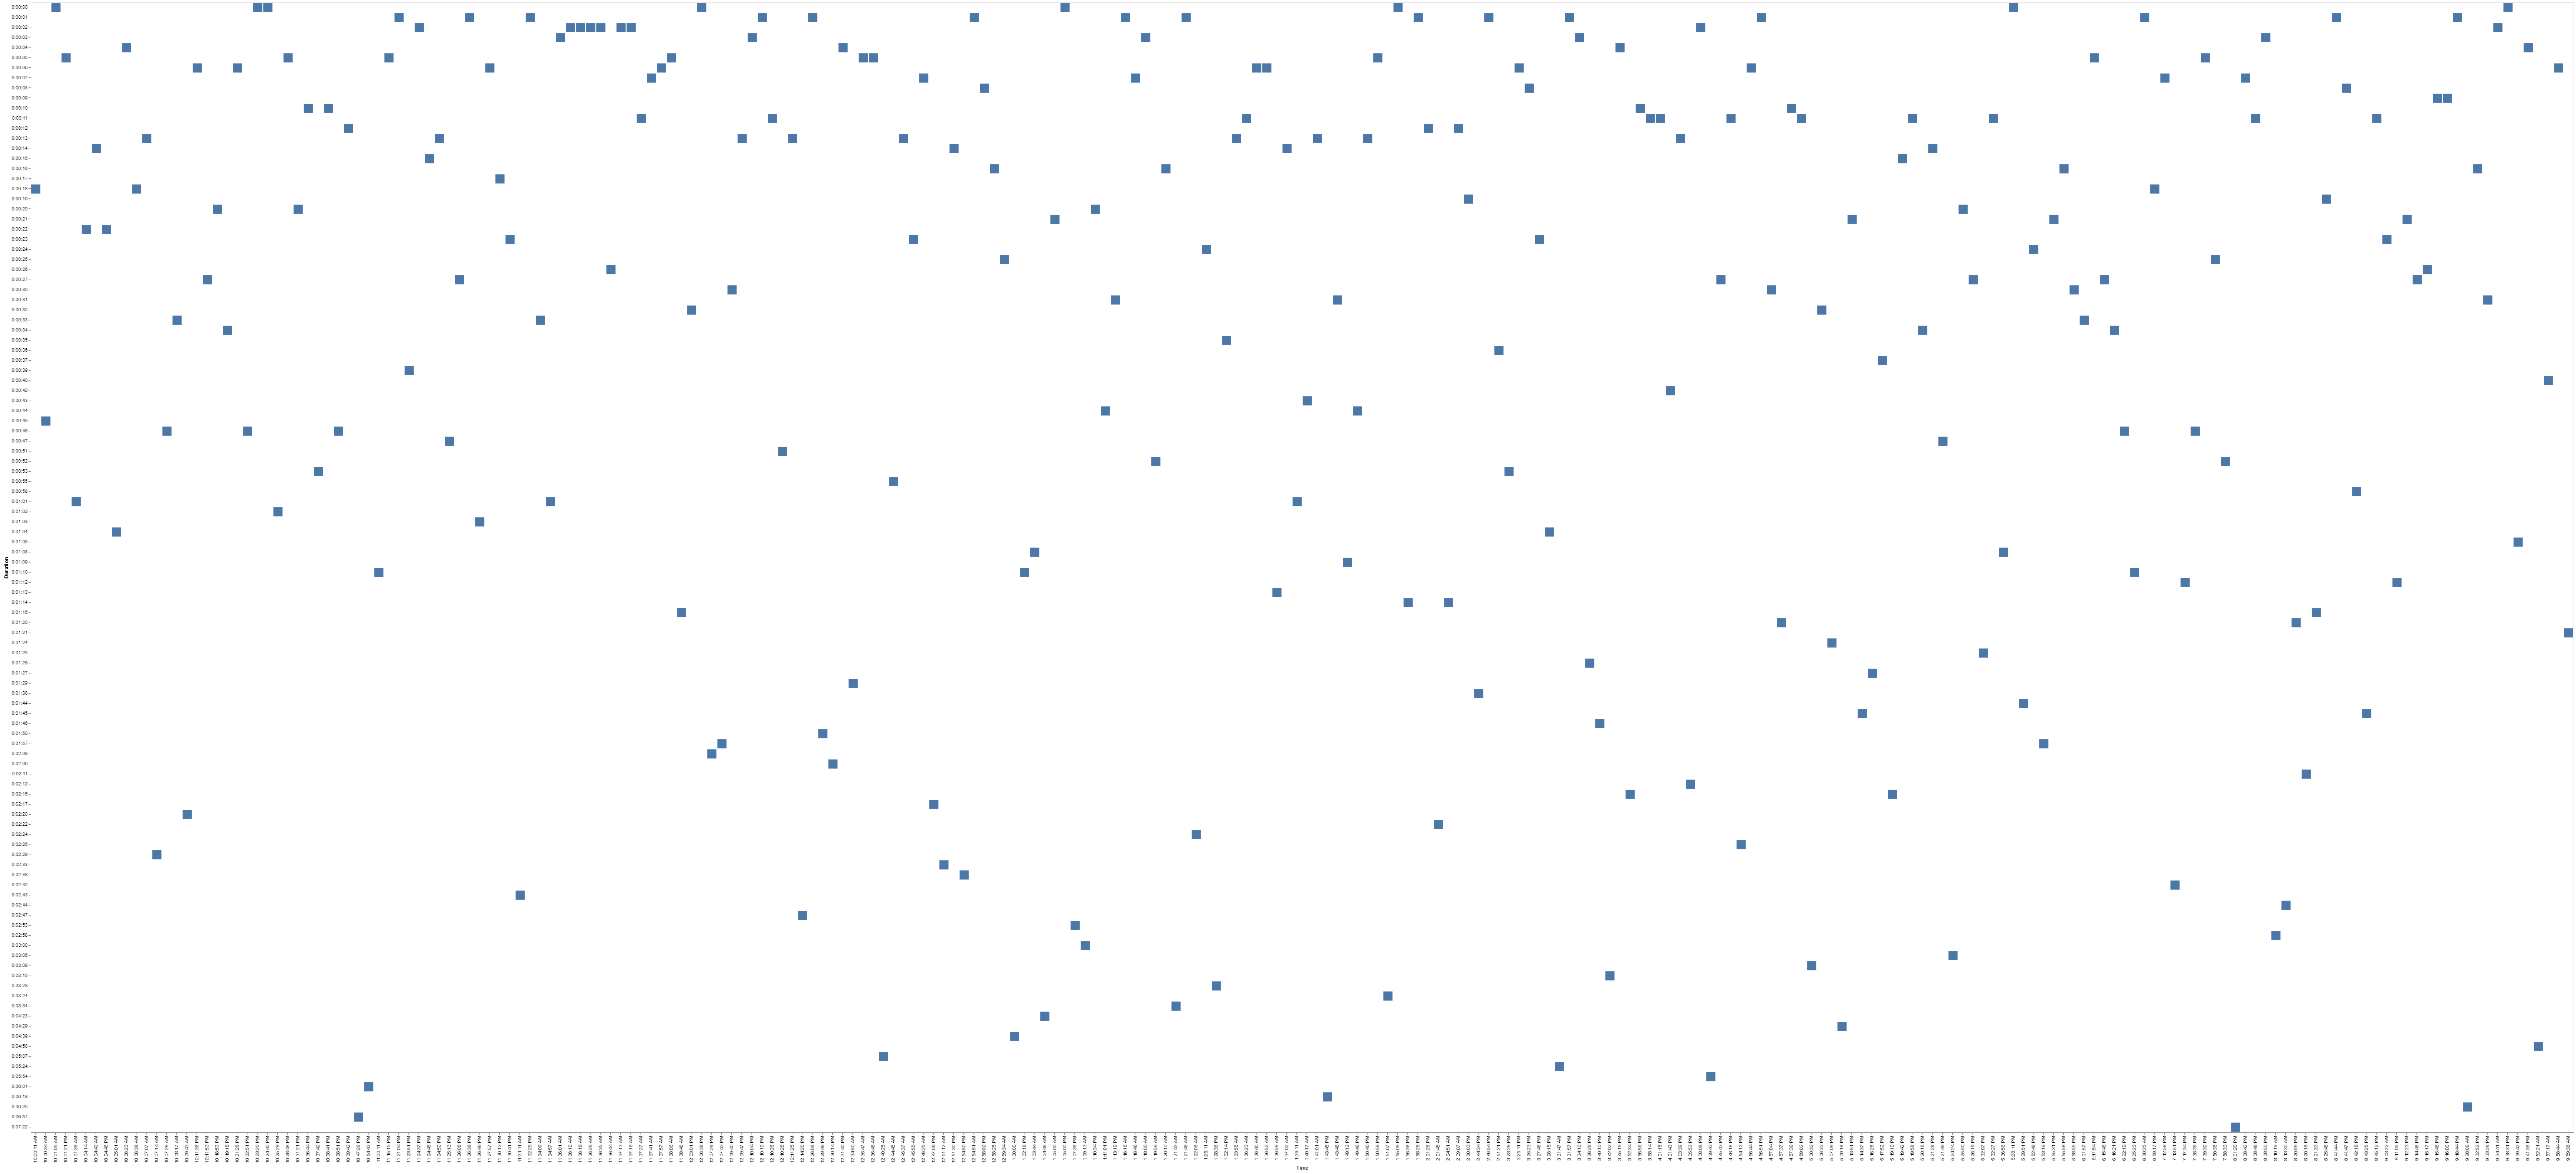

In [61]:
chart = alt.Chart(df[files]).mark_bar().encode(
    x='Time',
    y='Duration'
)

chart

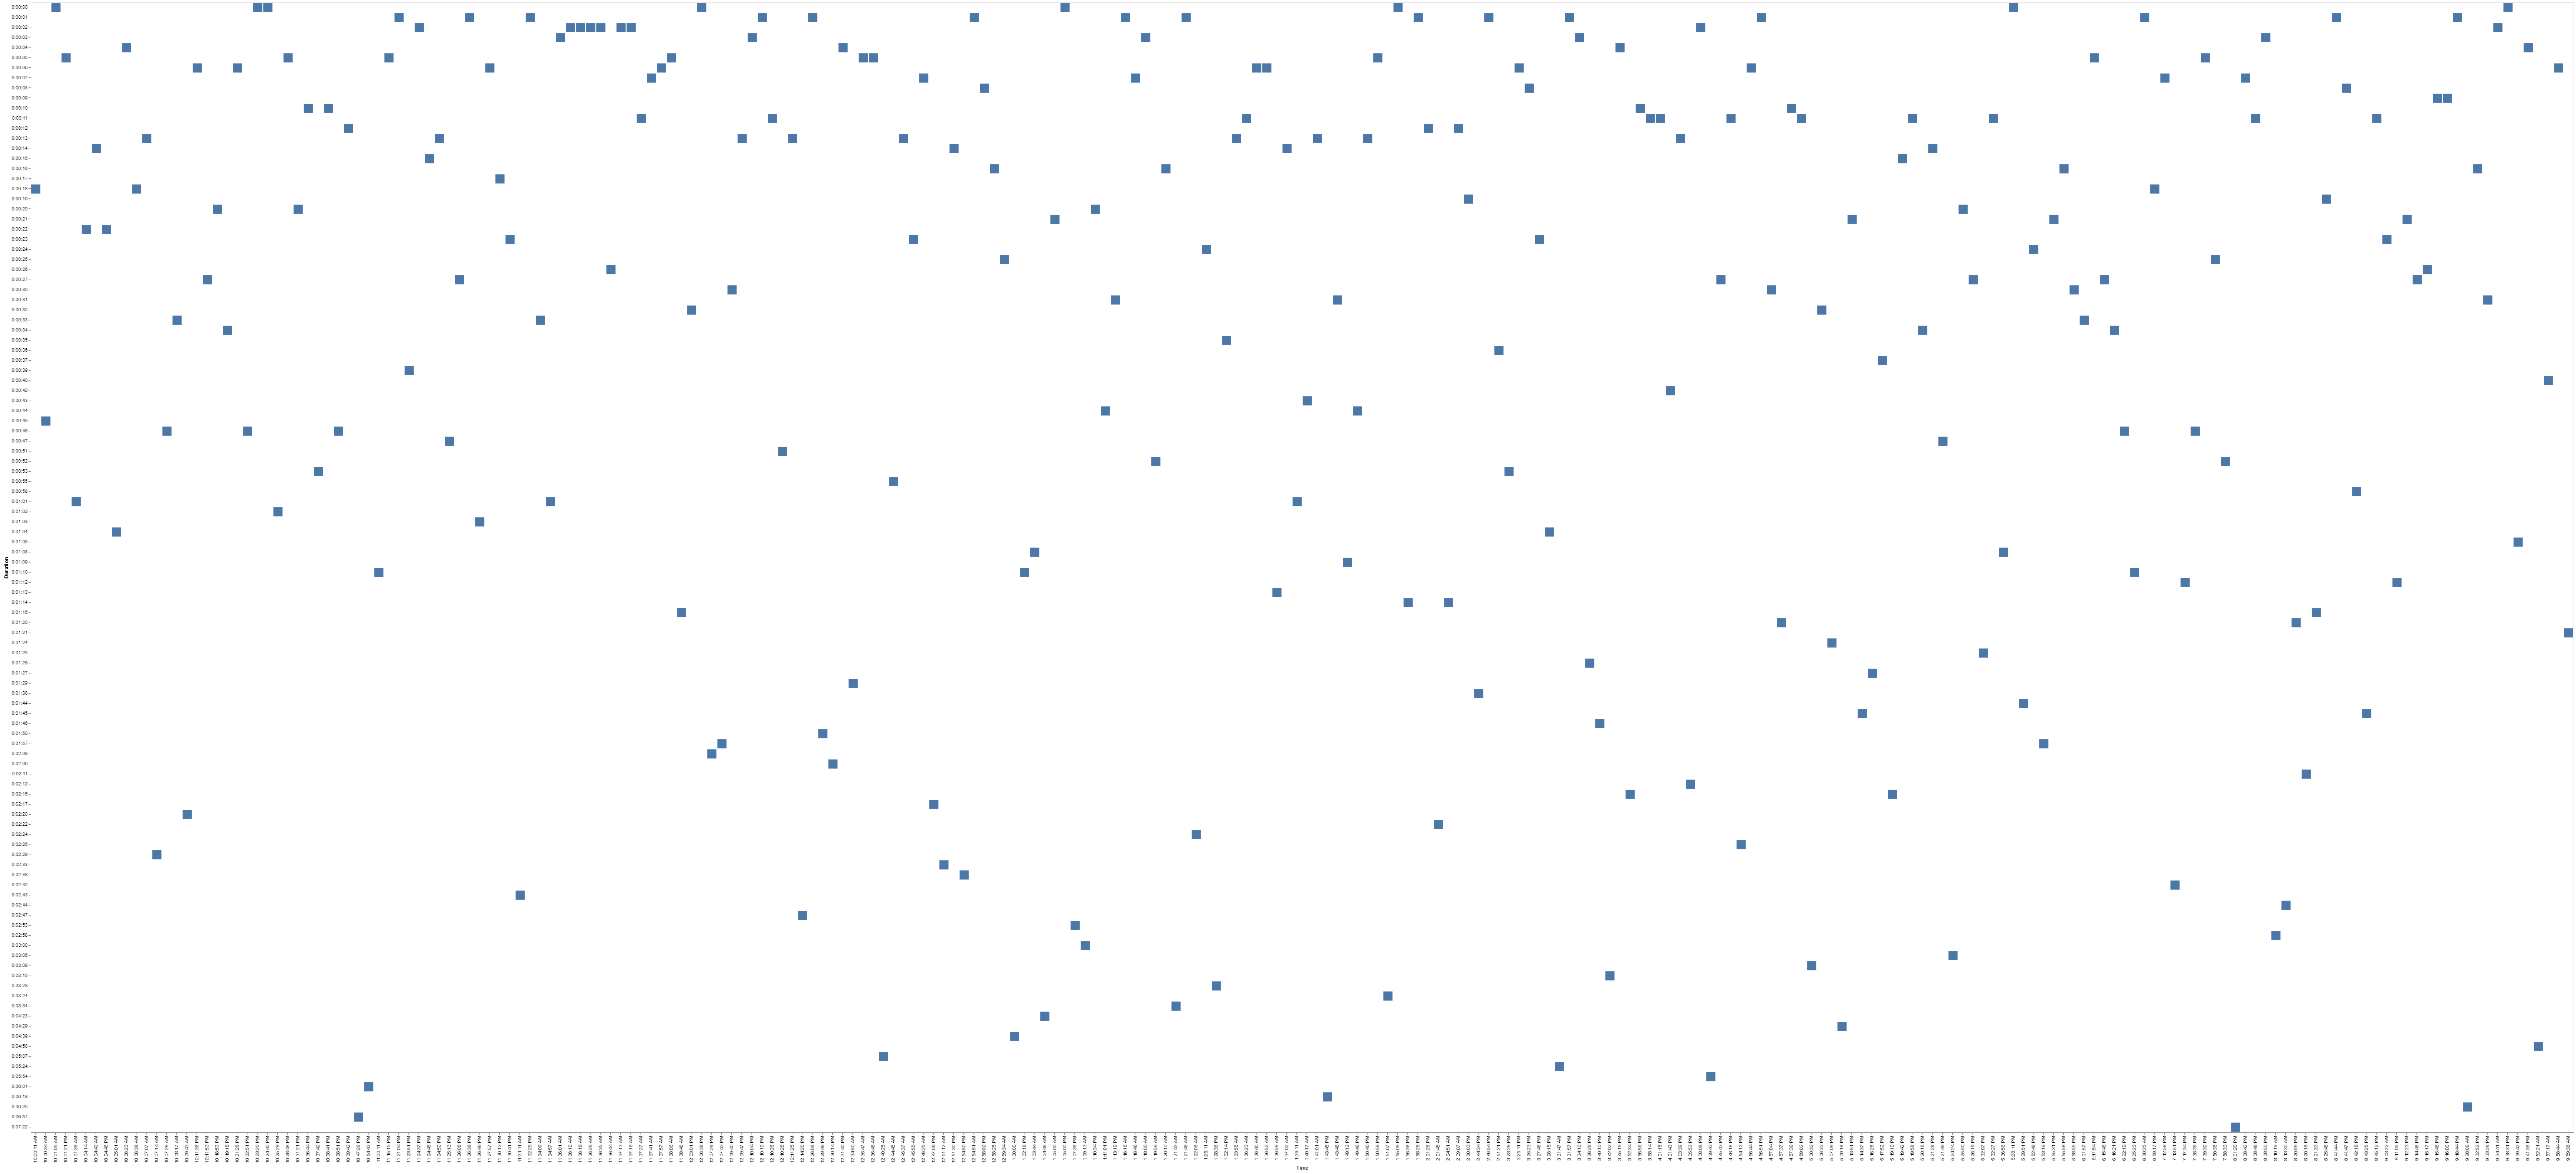

In [62]:
chart = alt.Chart(df[files]).mark_bar().encode(
    alt.X('Time'),
    alt.Y('Duration')
)

chart

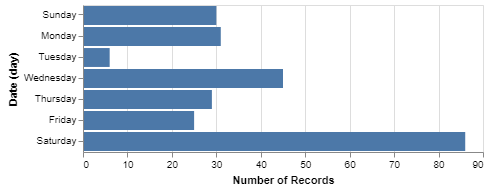

In [63]:
chart = alt.Chart(df[files]).mark_bar().encode(
    x='count(Time)',
    y='day(Date):O'
)

chart

In [64]:
df = df[files]
df.dtypes

App name    object
Date        object
Time        object
Duration    object
dtype: object

In [65]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

df.head()

,App name,Date,Time,Duration
42,Tinder,6/21/18,2018-08-02 16:46:16,0:00:11
45,Tinder,6/21/18,2018-08-02 16:45:43,0:00:27
48,Tinder,6/21/18,2018-08-02 16:39:43,0:05:54
124,Tinder,6/21/18,2018-08-02 13:55:09,0:00:00
129,Tinder,6/21/18,2018-08-02 13:51:07,0:03:24


In [66]:
# df = df.groupby([df['Time'].dt.floor('H')]).agg(['mean','sum', 'max']).reset_index()
# df.groupby(level=0)['Duration'].sum().reset_index()

df['Time'] = df['Time'].dt.to_period('H')

In [67]:
df.head()

,App name,Date,Time,Duration
42,Tinder,6/21/18,2018-08-02 16:00,0:00:11
45,Tinder,6/21/18,2018-08-02 16:00,0:00:27
48,Tinder,6/21/18,2018-08-02 16:00,0:05:54
124,Tinder,6/21/18,2018-08-02 13:00,0:00:00
129,Tinder,6/21/18,2018-08-02 13:00,0:03:24


In [85]:
grouped = df.groupby("Time")
grouped['Duration'].agg(np.sum)

Time
2018-08-02 00:00   00:11:23
2018-08-02 01:00   00:25:13
2018-08-02 02:00   00:03:48
2018-08-02 03:00   00:05:24
2018-08-02 06:00   00:00:01
2018-08-02 08:00   00:05:42
2018-08-02 09:00   00:13:47
2018-08-02 10:00   00:10:27
2018-08-02 11:00   00:07:52
2018-08-02 12:00   00:19:03
2018-08-02 13:00   00:23:15
2018-08-02 14:00   00:02:46
2018-08-02 15:00   00:11:45
2018-08-02 16:00   00:14:35
2018-08-02 17:00   00:29:47
2018-08-02 18:00   00:03:53
2018-08-02 19:00   00:06:09
2018-08-02 20:00   00:15:51
2018-08-02 21:00   00:04:41
2018-08-02 22:00   00:19:22
2018-08-02 23:00   00:04:20
Freq: H, Name: Duration, dtype: timedelta64[ns]

In [82]:
df['Duration'] = pd.to_timedelta(df.Duration) #,format= '%H:%M:%S' ).dt.time
# df.loc[[0], ['Duration']] = pd.to_datetime(df['Duration'])

In [83]:
df.dtypes

App name             object
Date                 object
Time                 object
Duration    timedelta64[ns]
dtype: object

In [ ]:
# df.groupby('Time')['Duration'].sum().reset_index()
import numpy as np
df = df.groupby(['Time'], as_index=False).Duration.sum()
res = df.agg({'Duration':[np.sum, np.min, np.max]})
df

In [ ]:
res.head()